In [15]:
import os, glob, json, pickle
import matplotlib.pyplot as plt
import numpy as np


In [16]:
folder = "output-simple/activation_cost/"

In [22]:
folder = "output/activation_cost/"

In [23]:
sol_path_style = os.path.join(folder, "sol_*.json")
sol_paths = glob.glob(sol_path_style)
sols = [json.load(open(sol_path, "rb")) for sol_path in sol_paths]

network_path_style = os.path.join(folder, "network_*.pickle")
network_paths = glob.glob(network_path_style)
networks = [pickle.load(open(network_path, "rb")).to_dict() for network_path in network_paths]

In [24]:
obj_vals = [sol['SolutionInfo']['ObjVal'] for sol in sols]


In [25]:
radii = [network['radius'][0] for network in networks]
activation_costs = [network['activation_cost'][-1] for network in networks]
angel_demands = [network['angel_demand'][-1] for network in networks]

In [26]:
sorted_radii = sorted(activation_costs)
idx = np.argsort(activation_costs)
sorted_obj = [obj_vals[i] for i in idx]

In [21]:
simple_radii = sorted_radii
simple_obj = sorted_obj

In [27]:
complex_radii = sorted_radii
complex_obj = sorted_obj

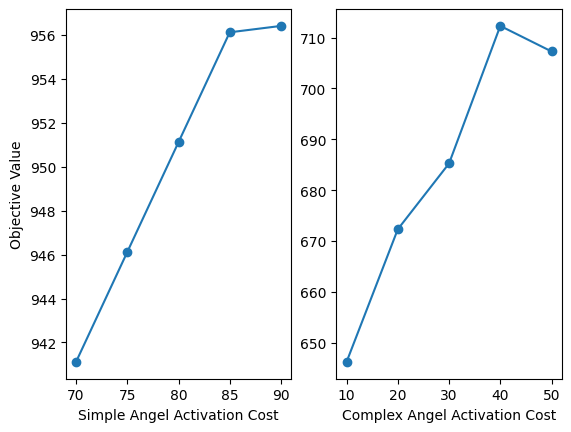

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(simple_radii, simple_obj, marker='o')
ax1.set(xlabel='Simple Angel Activation Cost', ylabel='Objective Value')
# ax1.xlabel('Simple Angel Radius')
# ax1.ylabel('Objective Value')
ax2.plot(complex_radii, complex_obj, marker='o')
# ax2.xlabel('Complex Angel Radius')
# ax2.ylabel('Objective Value')
ax2.set(xlabel='Complex Angel Activation Cost')

plt.show()

# Connectivity

In [1]:
import os, glob, json, pickle
import matplotlib.pyplot as plt
import numpy as np


In [2]:
folder = "output-simple/connectivity/"
vals = [0.5, 0.75, 0.9]

In [ ]:
folder = "output/connectivity/"
vals = [0.45, 0.6, 0.75, 0.9]

In [3]:
sols = {}
networks = {}
for val in vals:
    sol_path_style = os.path.join(folder, f"sol_c-{val}*.json")
    sol_paths = glob.glob(sol_path_style)
    subsols = [json.load(open(sol_path, "rb")) for sol_path in sol_paths]
    sols[val] = subsols

    network_path_style = os.path.join(folder, f"network_c-{val}*.pickle")
    network_paths = glob.glob(network_path_style)
    subnetworks = [pickle.load(open(network_path, "rb")).to_dict() for network_path in network_paths]
    networks[val] = subnetworks

In [4]:
avg_obj_vals = {}
for val in vals:
    avg_obj_vals[val] = np.average([sol['SolutionInfo']['ObjVal'] for sol in sols[val]])

In [5]:
simple = avg_obj_vals

In [ ]:
_complex = avg_obj_vals

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot([k for k in simple.keys()], [simple[k] for k in simple.keys()], marker='o')
ax1.set(xlabel='Simple Connectivity', ylabel='Objective Value')
# ax1.xlabel('Simple Angel Radius')
# ax1.ylabel('Objective Value')
ax2.plot([k for k in _complex.keys()], [_complex[k] for k in _complex.keys()], marker='o')
# ax2.xlabel('Complex Angel Radius')
# ax2.ylabel('Objective Value')
ax2.set(xlabel='Complex Connectivity')

plt.show()